# Pakistan House Price Data Anlaysis

TODO - This analysis is based on the data of Pakistan House price.
TODO - About the Data Set
    . The source is Kaggle
    . Contains houseing price 
    . Can be useful to predict current housing price of Pakistan 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading The Data

In [2]:
df = pd.read_csv('house_price_pakistan.csv')

In [3]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [4]:
df.shape

(168446, 18)

## Data Preparation and Cleaning

In [5]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

In [6]:
# to drop : Unnamed: 0 , page_url, latitue,longitue,
df2 = df.drop(['Unnamed: 0','page_url','latitude','longitude','date_added','agency','agent'],axis=1)

In [7]:
df2.shape

(168446, 11)

In [8]:
df2.head(10)

,property_id,location_id,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008
5,850762,3390,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,8,For Sale,8,87120.000
6,937975,445,House,27000000,Korang Town,Islamabad,Islamabad Capital,8,For Sale,8,5445.000
7,1258636,3241,Flat,7800000,E-11,Islamabad,Islamabad Capital,2,For Sale,2,16879.562
8,1402466,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,7,For Sale,7,5445.000
9,1418706,3282,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,5,For Sale,5,5445.000


In [9]:
df2 = df2.drop('property_id',axis=1)

In [10]:
df2.head()

,location_id,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,764,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [11]:
df3 = df2.drop('location_id',axis=1)

In [12]:
df3.head()

,property_type,price,location,city,province_name,baths,purpose,bedrooms,Total_Area
0,Flat,10000000,G-10,Islamabad,Islamabad Capital,2,For Sale,2,1089.004
1,Flat,6900000,E-11,Islamabad,Islamabad Capital,3,For Sale,3,15246.056
2,House,16500000,G-15,Islamabad,Islamabad Capital,6,For Sale,5,2178.008
3,House,43500000,Bani Gala,Islamabad,Islamabad Capital,4,For Sale,4,10890.000
4,House,7000000,DHA Defence,Islamabad,Islamabad Capital,3,For Sale,3,2178.008


In [13]:
df3.shape

(168446, 9)

In [14]:
df3.info

<bound method DataFrame.info of        property_type     price             location       city  \
0               Flat  10000000                 G-10  Islamabad   
1               Flat   6900000                 E-11  Islamabad   
2              House  16500000                 G-15  Islamabad   
3              House  43500000            Bani Gala  Islamabad   
4              House   7000000          DHA Defence  Islamabad   
...              ...       ...                  ...        ...   
168441         House  26500000           Gadap Town    Karachi   
168442         House  12500000           Gadap Town    Karachi   
168443         House  27000000           Gadap Town    Karachi   
168444         House  11000000           Gadap Town    Karachi   
168445         House   9000000  Bahria Town Karachi    Karachi   

            province_name  baths   purpose  bedrooms  Total_Area  
0       Islamabad Capital      2  For Sale         2    1089.004  
1       Islamabad Capital      3  For Sal

In [15]:
df3.describe()

,price,baths,bedrooms,Total_Area
count,1.684460e+05,168446.000000,168446.000000,1.684460e+05
mean,1.776576e+07,2.874227,3.179422,1.394239e+04
std,3.531003e+07,2.463400,1.971401,8.623647e+05
min,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,1.750000e+05,0.000000,2.000000,1.905757e+03
50%,8.500000e+06,3.000000,3.000000,4.356016e+03
75%,1.950000e+07,4.000000,4.000000,1.197904e+04
max,2.000000e+09,403.000000,68.000000,3.387988e+08


In [17]:
len(df3.price.unique())

2077

In [18]:
import seaborn as sns

<Figure size 1000x700 with 0 Axes>

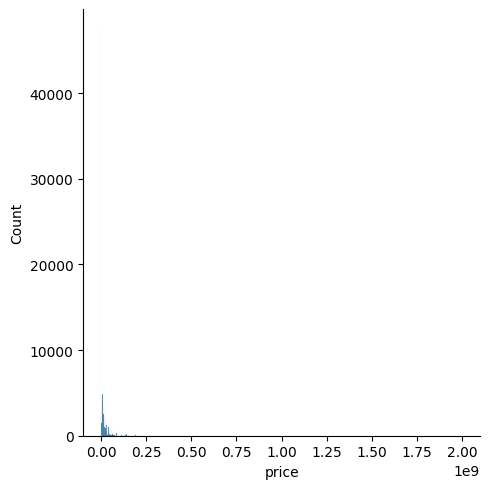

In [20]:
fig = plt.figure(figsize=(10,7))
sns.displot(df3.price)

(array([1.2671e+05, 2.2635e+04, 9.2450e+03, 3.5100e+03, 1.8170e+03,
        1.2150e+03, 8.9900e+02, 6.5500e+02, 3.7100e+02, 3.3800e+02,
        2.0500e+02, 1.4500e+02, 1.6700e+02, 7.7000e+01, 8.4000e+01,
        9.3000e+01, 3.8000e+01, 6.3000e+01, 2.0000e+01, 1.6000e+01,
        3.2000e+01, 1.2000e+01, 1.9000e+01, 3.0000e+00, 4.0000e+00,
        9.0000e+00, 1.0000e+00, 1.4000e+01, 1.0000e+00, 0.0000e+00,
        8.0000e+00, 1.0000e+00, 7.0000e+00, 1.0000e+00, 1.0000e+00,
        3.0000e+00, 1.0000e+00, 5.0000e+00, 0.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 4.0000e+00, 0.0000e+00, 1.0000e+00,
        2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        2.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        1.0000e+00, 0.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 1.0000e+00, 1.0000e+00, 0.00

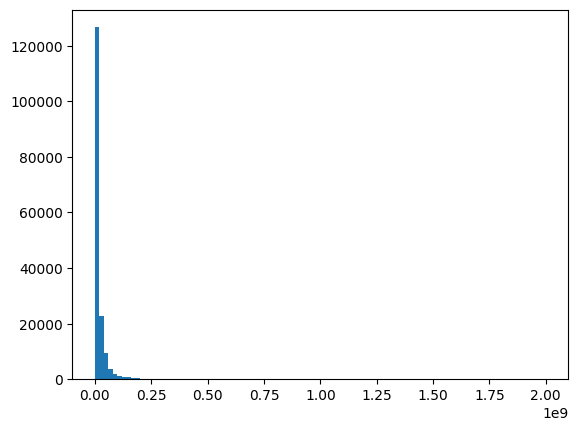

In [22]:
plt.hist(df3.price,bins=100)

### Area

In [24]:
df3.columns

Index(['property_type', 'price', 'location', 'city', 'province_name', 'baths',
       'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [26]:
df3.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

## Exploratory Analysis and Visualization

## Ask and Answer Questions

## Summary and Conclusion